# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [92]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [93]:
#Import CSV
import os

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [94]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)

ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [95]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [96]:
#city_data_df.head()

In [97]:
#ride_data_df.head()

## Deliverable 1: Get a Summary DataFrame 

In [98]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [99]:
total_rides_df = pd.DataFrame({'Total Rides': total_rides})
#total_rides_df

In [100]:
# 2. Get the total drivers for each city type

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [101]:
#total_drivers_df = pd.DataFrame({'Total Drivers':total_drivers})
#total_drivers_df

In [102]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [103]:
#total_fares_df = pd.DataFrame({'Total Fares' : total_fares}) 
#total_fares_df

In [104]:
#  4. Get the average fare per ride for each city type. 

ride_fare_avg = total_fares / total_rides
ride_fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [105]:
#ride_fare_avg_df = pd.DataFrame({"Average Fare per Ride": ride_fare_avg})
#ride_fare_avg_df

In [106]:
# 5. Get the average fare per driver for each city type. 

driver_fare_avg = total_fares / total_drivers
driver_fare_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [107]:
#driver_fare_avg_df= pd.DataFrame({'Average Fare per Driver':driver_fare_avg})
#driver_fare_avg_df

In [108]:
#  6. Create a PyBer summary DataFrame. 

#Create DataFrames for each summary

#Total Rides
total_rides_df = pd.DataFrame({'Total Rides': total_rides})

#Total Drivers
total_drivers_df = pd.DataFrame({'Total Drivers':total_drivers})

#TotalFares
total_fares_df = pd.DataFrame({'Total Fares' : total_fares})

#Average Fare per Ride
ride_fare_avg_df = pd.DataFrame({"Average Fare per Ride": ride_fare_avg})

#Average Far per Driver
driver_fare_avg_df= pd.DataFrame({'Average Fare per Driver':driver_fare_avg})

#Merge the new df's to create a new Summary Df

pyber_summary_df = pd.merge(total_rides_df, total_drivers_df, on = ['type'], how="left")

pyber_summary_df=pyber_summary_df.merge(total_fares_df,on = ['type'], how="left")

pyber_summary_df=pyber_summary_df.merge(ride_fare_avg_df,on = ['type'], how="left")

pyber_summary_df= pyber_summary_df.merge(driver_fare_avg_df,on = ['type'], how="left")


pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [109]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [110]:
#  8. Format the columns.

In [111]:
#Total Rides
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)

#Total Drivers
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)

#TotalFares
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)

#Average Fare per Ride
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

#Average Far per Driver
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)

In [112]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [113]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [114]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_time_df = pd.DataFrame(pyber_data_df.groupby(['type','date']).sum()[['fare']])
pyber_time_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [115]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#
pyber_time_df = pyber_time_df.reset_index()
pyber_time_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [136]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_time_pivot = pyber_time_df.pivot(index="date", columns = "type", values = 'fare')
pyber_time_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [137]:
pyber_time_pivot.index.name = None
pyber_time_pivot= pyber_time_pivot['2019-01-01':'2019-04-29']
pyber_time_pivot

type,Rural,Suburban,Urban
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [138]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_df = pd.DataFrame()

pyber_pivot_df= pyber_time_pivot

pyber_pivot_df

type,Rural,Suburban,Urban
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [139]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_pivot_df.index = pd.to_datetime(pyber_pivot_df.index)

In [140]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [141]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_profit_weeks = pyber_pivot_df.resample("W").sum()
sum_profit_weeks.head()

type,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


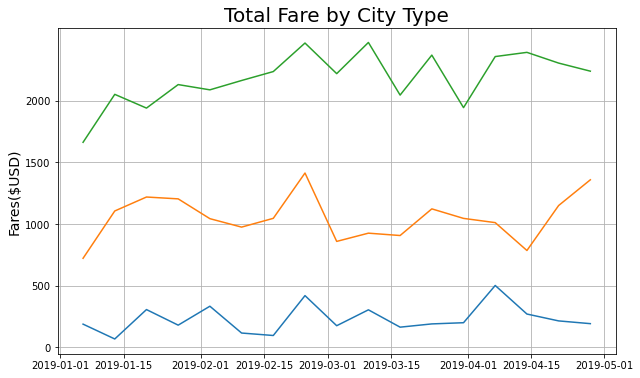

In [150]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 


import numpy as np

x_labels = ['fare']


#Now Create the figure and Set Figure Size using figure()inside the ()

fig, ax = plt.subplots(figsize=(10, 6))

#Add Title
ax.set_title('Total Fare by City Type',fontsize=20)

#Add y axes labels w/ fontsizes 

ax.set_ylabel('Fares($USD)',fontsize=14)

#Now add in the ax plot

ax.plot(sum_profit_weeks)
                       

#Set y ticks

ax.set_yticks(np.arange(0, 2500, step = 500.0))

#Add grid
ax.grid()

#Save Figure
#plt.savefig("Ride_Count_Figure.png")

#Show Plot
plt.show()


